# 使用Functional API打造神經網路，記得加一些像是分岔的部分在你的模型結構中
# 使用mnist 資料庫

In [1]:
%matplotlib widget
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils, plot_model
from keras.layers import Dense, Activation, Dropout, Input, concatenate, add, Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, History
from keras.models import Model
import tensorflow as tf
#tf.enable_eager_execution()

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# 檢查資料維度

In [3]:
print('The dimension is {0}, {1}, {2}, {3}.'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

The dimension is (60000, 28, 28), (60000,), (10000, 28, 28), (10000,).


In [12]:
x_train_t = x_train.reshape(60000, 28*28)
x_test_t = x_test.reshape(10000, 28*28)
x_train_t = (x_train_t - x_train_t.min()) / (x_train_t.max() - x_train_t.min())
x_test_t = (x_test_t - x_test_t.min()) / (x_test_t.max() - x_test_t.min())
y_train_t = np_utils.to_categorical(y_train, 10)
y_test_t = np_utils.to_categorical(y_test, 10)

In [5]:
inputlayer = Input(shape=(28*28,))
hiddenlayer_nodes1_1 = Dense(5, activation='relu')(inputlayer)
hiddenlayer_nodes2_1 = Dense(5, activation='sigmoid')(inputlayer)
hiddenlayer_nodes1_2 = Dense(10, activation='relu')(hiddenlayer_nodes1_1 )
hiddenlayer_nodes2_2 = Dense(20, activation='sigmoid')(hiddenlayer_nodes2_1 )
hiddenlayer_nodes1_3 = Dense(10, activation='relu')(hiddenlayer_nodes1_2 )
hiddenlayer_nodes2_3 = Dense(20, activation='sigmoid')(hiddenlayer_nodes2_2 )
hiddenlayer_nodes1_4 = Dense(10, activation='relu')(hiddenlayer_nodes1_3 )
hiddenlayer_nodes2_4 = Dense(20, activation='sigmoid')(hiddenlayer_nodes2_3 )

#hiddenlayer_nodes3_1 = Dense(5, activation='sigmoid')
#hiddenlayer_nodes3_2 = Dense(20, activation='sigmoid')(hiddenlayer_nodes3_1 )

merge = concatenate([hiddenlayer_nodes1_4, hiddenlayer_nodes2_4])
outputlayer = Dense(10, activation='softmax')(merge)
model = Model(inputs=[inputlayer], outputs=outputlayer)

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
plot_model(model, to_file='wk8_functionapi_fractured_model.png', show_shapes=True)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            3925        input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 5)            3925        input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 10)           60          dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

# 模型流程圖
<img src="wk8_functionapi_fractured_model.png">

In [14]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.087),metrics=['accuracy'])
model_his = model.fit(x_train_t, y_train_t, batch_size=100, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 91s 2ms/step - loss: 1.2267 - acc: 0.5556
Epoch 2/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.5874 - acc: 0.8156
Epoch 3/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.4660 - acc: 0.8636
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.4297 - acc: 0.8741
Epoch 5/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.4049 - acc: 0.8800


<function matplotlib.pyplot.show(*args, **kw)>

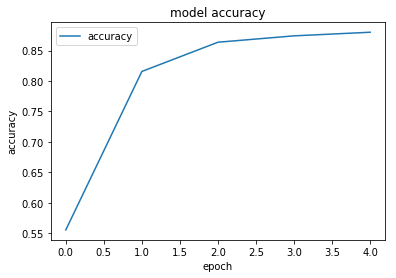

In [15]:
plt.plot(model_his.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show